<div>
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

**Project Goal**
- The main objective is to determine which of the two prepaid plans, Surf or Ultimate, generates more revenue for the telecom operator Megaline. This analysis will help the commercial department decide how to allocate the advertising budget effectively.

**Study Purpose**
- By analyzing a sample of 500 Megaline clients, we aim to:

    - Understand client behavior in terms of calls, text messages, and data usage.
    - Calculate the revenue generated by each plan.
    - Identify which plan is more profitable.
    - Provide insights to adjust marketing strategies based on the revenue potential of each plan.

**Main Steps in the Analysis**
    
Step 1: Data Loading and Initial Exploration

- Objective: Obtain a clear understanding of the dataset and ensure it is complete and accurate.
- Actions: Load the dataset, inspect for missing values, and understand the structure and types of data available.

Step 2: Data Preparation

- Objective: Prepare the data for analysis by applying the necessary rounding rules and calculating usage metrics.
- Actions:
    - Round each call duration up to the nearest minute.
    - Round the total monthly data usage up to the nearest gigabyte.
    - Aggregate monthly usage for each client.
    
Step 3: Feature Engineering

- Objective: Create new features that will help in calculating the revenue.
- Actions:
    - Calculate the total monthly usage per client for minutes, texts, and data.
    - Determine any overage usage that incurs additional charges.
    
Step 4: Revenue Calculation

- Objective: Compute the total revenue for each client based on their plan and usage.
- Actions:
    - For Surf Plan: Sum the base charge (`$20`) and overage charges (if any).
    - For Ultimate Plan: Sum the base charge (`$70`) and overage charges (if any).
    - Calculate total revenue generated by each plan.
    
Step 5: Comparative Analysis

- Objective: Compare the revenues of the two plans to identify which is more profitable.
- Actions:
    - Aggregate the total revenue from all clients for each plan.
    - Perform statistical analysis to determine if the revenue difference is significant.
    
Step 6: Visualization

- Objective: Create visualizations to illustrate the results of the analysis clearly.
- Actions:
    - Generate charts to compare the distribution of usage and revenue for each plan.
    - Present the findings visually to aid in decision-making.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import math

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?] 

**General Information:**

- The DataFrame `plans` contains 2 entries and 8 columns.
- All columns have non-null values, indicating there are no missing values in this DataFrame.

**Printed Sample Data:**

- There are two plans listed: `surf` and `ultimate`.

1. **Surf plan** includes:
    - 50 MB per month, 15360 minutes, and 500 messages.
    - Costs `$20` per GB, `$10` per message, and `$0.03` per minute.
    - Monthly pay is `$500`.

2. **Ultimate plan** includes:
    - 1000 MB per month, 30720 minutes, and 3000 messages.
    - Costs `$70` per GB, `$7` per message, and `$0.01` per minute.
    - Monthly pay is `$3000`.

**Observations:**

- Data Types:

    - The data types appear to be appropriate for the columns. int64 for countable values and float64 for cost-related values seem correct.
    - The plan_name as object is also appropriate since it is a categorical variable.

- Missing Data:

    - There are no missing values, so no imputation or handling of missing data is necessary.
    
**issues and Fixes:**

- Potential Issue with Pricing Columns:

    - Although the data types are appropriate, it's good practice to ensure that cost-related columns (usd_per_gb, usd_per_message, usd_per_minute, usd_monthly_pay) are correctly interpreted.
    - Ensure Correct Numeric Interpretation
   

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__


Great. First look at the data is done

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
plans.columns= ['messages included','mb included','minutes included', 'usd monthly charge', 'usd per gb', 'usd per message', 'usd per minute', 'plan']
plans

,messages included,mb included,minutes included,usd monthly charge,usd per gb,usd per message,usd per minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [6]:
print(f"Duplicates Values: {users.duplicated().sum()}")
plans

Duplicates Values: 0


,messages included,mb included,minutes included,usd monthly charge,usd per gb,usd per message,usd per minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


There are no Duplicates Values

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
429,1429,Arianna,Rowe,36,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-22,surf,NaN
385,1385,Nohemi,Erickson,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,NaN
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaN
128,1128,Lucius,Fernandez,41,"Knoxville, TN MSA",2018-01-25,ultimate,NaN
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**General Information:**

- The DataFrame users contains 500 entries and 8 columns.

- Data types:
    - user_id, age are of type int64.
    - first_name, last_name, city, reg_date, plan, churn_date are of type object.
    
- Missing Data:
    - The churn_date column has 34 non-null entries, indicating that the majority of users have not churned (are still active).
    
**Printed Sample Data:**

- The sample data shows various user details such as user_id, first_name, last_name, age, city, reg_date, plan, and churn_date.

**Observations:**

- Data Types:
    - The reg_date and churn_date columns should ideally be of datetime type instead of object type for better handling of date-related operations.   
    - The plan column should be a categorical type if it contains a limited number of unique values.
    
- Missing Data:
    - The churn_date column has many missing values (466 out of 500). This is expected as it indicates users who have not churned.
    
**Steps to Fix:**

- Convert Date Columns to Datetime.
- Convert Plan Column to Categorical.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format ='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format ='%Y-%m-%d')
users['plan'] = users['plan'].astype('category')
users.columns = ['user id', 'user\'s name', 'user\'s last name', 'user\'s age', 'city', 'subcripton date', 'plan', 'churn date']
users

,user id,user's name,user's last name,user's age,city,subcripton date,plan,churn date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [10]:
print(f"Duplicates Values: {users.duplicated().sum()}")
users['customer churn'] = np.where(users['churn date'].isnull(), 'No', 'Yes')
users

Duplicates Values: 0


,user id,user's name,user's last name,user's age,city,subcripton date,plan,churn date,customer churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,No
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,No
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,No
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,No
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,No
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,No
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,No
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,No


## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Print a sample of data for calls
calls.sample(5)


,id,user_id,call_date,duration
106970,1379_168,1379,2018-12-27,3.57
1998,1009_420,1009,2018-08-13,11.23
49815,1181_18,1181,2018-05-04,13.12
42445,1156_50,1156,2018-09-26,0.00
79015,1282_563,1282,2018-12-03,8.87


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**General Information:**

- The DataFrame calls contains 137,735 entries and 4 columns.

- Data types:
    - id and call_date are of type object.
    - user_id is of type int64.
    - duration is of type float64.
    
- There are no missing values in the dataset, as all columns have 137,735 non-null entries. 

**Printed Sample Data:**

- The sample data shows various call details such as id, user_id, call_date, and duration.

**Observations:**

- Data Types:

    - The call_date column should be of datetime type instead of object type for better handling of date-related operations.
    
- Missing Data:

    - There are no missing values in the dataset, so no imputation or handling of missing data is necessary.
    
    

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [13]:
calls['id'] = calls['id'].astype(int)
calls['call_date'] = pd.to_datetime(calls['call_date'], format ='%Y-%m-%d')
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.2 MB


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Good for you for using the np.ceil() method
    

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
calls.columns = ['id', 'user id', 'call date', 'duration(min)']
calls['call type'] = np.where(calls['duration(min)']==0, 'Missed Call', 'Connected Call')
calls['day'] = calls['call date'].dt.day_name()
calls['month'] = calls['call date'].dt.month
calls['year'] = calls['call date'].dt.year
print(f"Duplicates Values: {calls.duplicated().sum()}")
calls

Duplicates Values: 0


,id,user id,call date,duration(min),call type,day,month,year
0,100093,1000,2018-12-27,9,Connected Call,Thursday,12,2018
1,1000145,1000,2018-12-27,14,Connected Call,Thursday,12,2018
2,1000247,1000,2018-12-27,15,Connected Call,Thursday,12,2018
3,1000309,1000,2018-12-28,6,Connected Call,Friday,12,2018
4,1000380,1000,2018-12-30,5,Connected Call,Sunday,12,2018
...,...,...,...,...,...,...,...,...
137730,1499199,1499,2018-11-21,9,Connected Call,Wednesday,11,2018
137731,1499200,1499,2018-10-20,11,Connected Call,Saturday,10,2018
137732,1499201,1499,2018-09-21,9,Connected Call,Friday,9,2018
137733,1499202,1499,2018-10-10,1,Connected Call,Wednesday,10,2018


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Duplicate checking is the basis of data preprocessing

## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Print a sample of data for messages
messages.sample(5)


,id,user_id,message_date
8248,1061_254,1061,2018-08-02
44586,1298_42,1298,2018-12-31
12378,1081_128,1081,2018-09-15
17335,1114_184,1114,2018-07-27
21857,1132_1370,1132,2018-04-30


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**General Information:**

- The DataFrame messages contains 76,051 entries and 3 columns.
- Data types:
    - id and message_date are of type object.
    - user_id is of type int64.
- There are no missing values in the dataset, as all columns have 76,051 non-null entries.

**Printed Sample Data:**

- The sample data shows various message details such as id, user_id, and message_date.

**Observations:**

- Data Types:

    - The message_date column should be of datetime type instead of object type for better handling of date-related operations.

- Missing Data:

    - There are no missing values in the dataset, so no imputation or handling of missing data is necessary.


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
messages['id'] = messages['id'].astype(int)
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [18]:
messages.columns = ['id', 'user id', 'message date']
messages['day'] = messages['message date'].dt.day_name()
messages['month'] = messages['message date'].dt.month
messages['year'] = messages['message date'].dt.year
print(f"Duplicates Values: {messages.duplicated().sum()}")
messages

Duplicates Values: 0


,id,user id,message date,day,month,year
0,1000125,1000,2018-12-27,Thursday,12,2018
1,1000160,1000,2018-12-31,Monday,12,2018
2,1000223,1000,2018-12-31,Monday,12,2018
3,1000251,1000,2018-12-27,Thursday,12,2018
4,1000255,1000,2018-12-26,Wednesday,12,2018
...,...,...,...,...,...,...
76046,1497526,1497,2018-12-24,Monday,12,2018
76047,1497536,1497,2018-12-24,Monday,12,2018
76048,1497547,1497,2018-12-31,Monday,12,2018
76049,1497558,1497,2018-12-24,Monday,12,2018


## Internet

In [19]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Print a sample of data for the internet traffic
internet.sample(5)

,id,user_id,session_date,mb_used
50822,1226_303,1226,2018-11-17,464.77
103088,1493_206,1493,2018-08-14,952.41
45986,1203_311,1203,2018-12-11,534.29
71299,1332_272,1332,2018-10-09,508.15
57475,1259_16,1259,2018-05-20,445.27


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**General Information:**

- The DataFrame internet contains 104,825 entries and 4 columns.
- Data types:
    - id and session_date are of type object.
    - user_id is of type int64.
    - mb_used is of type float64.
- There are no missing values in the dataset, as all columns have 104,825 non-null entries.

**Printed Sample Data:**

- The sample data shows various internet usage details such as id, user_id, session_date, and mb_used.

**Observations:**

- Data Types:

    - The session_date column should be of datetime type instead of object type for better handling of date-related operations.

**Missing Data:**

- There are no missing values in the dataset, so no imputation or handling of missing data is necessary. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

I agree

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [21]:
internet['id'] = internet['id'].astype(int)
internet['session_date'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')
internet['mb_used'] = internet['mb_used'].apply(lambda x: math.ceil(x))


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [22]:
internet.columns = ['id', 'user id', 'session date', 'data used']
internet['day'] = internet['session date'].dt.day_name()
internet['month'] = internet['session date'].dt.month
internet['year'] = internet['session date'].dt.year
print(f"Duplicates Values: {internet.duplicated().sum()}")
internet

Duplicates Values: 0


,id,user id,session date,data used,day,month,year
0,100013,1000,2018-12-29,90,Saturday,12,2018
1,1000204,1000,2018-12-31,0,Monday,12,2018
2,1000379,1000,2018-12-28,661,Friday,12,2018
3,1000413,1000,2018-12-26,271,Wednesday,12,2018
4,1000442,1000,2018-12-27,881,Thursday,12,2018
...,...,...,...,...,...,...,...
104820,1499215,1499,2018-10-20,219,Saturday,10,2018
104821,1499216,1499,2018-12-30,305,Sunday,12,2018
104822,1499217,1499,2018-09-22,293,Saturday,9,2018
104823,1499218,1499,2018-12-07,0,Friday,12,2018


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [23]:
# Print out the plan conditions and make sure they are clear for you
plans

,messages included,mb included,minutes included,usd monthly charge,usd per gb,usd per message,usd per minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [24]:
# Calculate the number of calls made by each user per month. Save the result.
calls_made = calls.groupby(['user id', 'month', ]).agg({'id': 'count'}).rename(columns={'id': 'calls made'})
calls_made.describe()
calls_made


calls made
user id month            
1000    12             16
1001    8              27
        9              49
        10             65
        11             64
...                   ...
1498    12             39
1499    9              41
        10             53
        11             45
        12             65

[2258 rows x 1 columns]

In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_spent = calls.groupby(['user id', 'month']).agg({'duration(min)': 'sum'})
minutes_spent

duration(min)
user id month               
1000    12               124
1001    8                182
        9                315
        10               393
        11               426
...                      ...
1498    12               339
1499    9                346
        10               385
        11               308
        12               496

[2258 rows x 1 columns]

In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_sent = messages.groupby(['user id', 'month']).agg({'id': 'count'}).rename(columns={'id': 'messages sent'})
messages_sent

messages sent
user id month               
1000    12                11
1001    8                 30
        9                 44
        10                53
        11                36
...                      ...
1496    9                 21
        10                18
        11                13
        12                11
1497    12                50

[1806 rows x 1 columns]

In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_traffic = internet.groupby(['user id', 'month']).agg({'data used': 'sum'})
internet_traffic


data used
user id month           
1000    12          1903
1001    8           6929
        9          13333
        10         22356
        11         18524
...                  ...
1498    12         23160
1499    9          13004
        10         19515
        11         16834
        12         22091

[2277 rows x 1 columns]

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [28]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merge_data = pd.concat([calls_made, minutes_spent, messages_sent, internet_traffic], axis='columns').fillna(0).reset_index()
merge_data = merge_data.merge(users, on='user id')
merge_data

,user id,month,calls made,duration(min),messages sent,data used,user's name,user's last name,user's age,city,subcripton date,plan,churn date,customer churn
0,1000,12,16.0,124.0,11.0,1903.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,No
1,1001,8,27.0,182.0,30.0,6929.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
2,1001,9,49.0,315.0,44.0,13333.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
3,1001,10,65.0,393.0,53.0,22356.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
4,1001,11,64.0,426.0,36.0,18524.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23160.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,No
2289,1499,9,41.0,346.0,0.0,13004.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,No
2290,1499,10,53.0,385.0,0.0,19515.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,No
2291,1499,11,45.0,308.0,0.0,16834.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,No


In [29]:
# Add the plan information
merge_data = merge_data.merge(plans, left_on ='plan', right_on='plan')
merge_data

,user id,month,calls made,duration(min),messages sent,data used,user's name,user's last name,user's age,city,...,plan,churn date,customer churn,messages included,mb included,minutes included,usd monthly charge,usd per gb,usd per message,usd per minute
0,1000,12,16.0,124.0,11.0,1903.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,No,1000,30720,3000,70,7,0.01,0.01
1,1006,11,2.0,10.0,15.0,2072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01
2,1006,12,9.0,59.0,139.0,32144.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01
3,1008,10,71.0,476.0,21.0,17131.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,No,1000,30720,3000,70,7,0.01,0.01
4,1008,11,63.0,446.0,37.0,23706.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,No,1000,30720,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23160.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,surf,NaT,No,50,15360,500,20,10,0.03,0.03
2289,1499,9,41.0,346.0,0.0,13004.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,surf,NaT,No,50,15360,500,20,10,0.03,0.03
2290,1499,10,53.0,385.0,0.0,19515.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,surf,NaT,No,50,15360,500,20,10,0.03,0.03
2291,1499,11,45.0,308.0,0.0,16834.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,surf,NaT,No,50,15360,500,20,10,0.03,0.03


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [30]:
# Calculate the monthly revenue for each user

merge_data['message cost'] = merge_data.apply(lambda x: max(0, x['messages sent'] - x['messages included']) * x['usd per message'], 
                                      axis = 1)
merge_data['call cost'] = merge_data.apply(lambda x: max(0, x['duration(min)'] - x['minutes included']) * x['usd per minute'], 
                                   axis = 1)
merge_data['gb cost'] = merge_data.apply(lambda x: np.ceil(max(0, x['data used'] - x['mb included'])/1024)*x['usd per gb'], 
                                axis = 1)
merge_data['revenue'] = merge_data['message cost'] + merge_data['call cost'] + merge_data['gb cost'] + merge_data['usd monthly charge']
merge_data.head()


,user id,month,calls made,duration(min),messages sent,data used,user's name,user's last name,user's age,city,...,mb included,minutes included,usd monthly charge,usd per gb,usd per message,usd per minute,message cost,call cost,gb cost,revenue
0,1000,12,16.0,124.0,11.0,1903.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
1,1006,11,2.0,10.0,15.0,2072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
2,1006,12,9.0,59.0,139.0,32144.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,14.0,84.0
3,1008,10,71.0,476.0,21.0,17131.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
4,1008,11,63.0,446.0,37.0,23706.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

That's right. There are 1,024 megabytes in one gigabyte.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great code

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

<AxesSubplot:title={'center':'Average Duration of Calls per Plan per Month'}, xlabel='Month', ylabel='Duration(min)'>

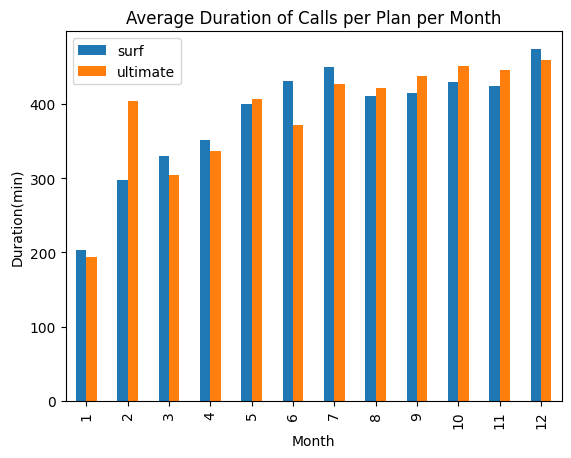

In [31]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
average_call_duration = merge_data.groupby(['month', 'plan'])['duration(min)'].mean()
average_call_duration = average_call_duration.unstack(level ='plan')
average_call_duration = average_call_duration.reset_index()
average_call_duration.columns.name= None
average_call_duration.plot(kind='bar', x= 'month', xlabel='Month', ylabel='Duration(min)', title='Average Duration of Calls per Plan per Month')


      duration(min)         
plan           surf ultimate
month                       
1             406.0    774.0
2            2673.0   2822.0
3            7590.0   3651.0
4           17577.0   7074.0
5           30768.0  11781.0
6           41836.0  17435.0
7           54448.0  25197.0
8           66438.0  29922.0
9           80360.0  37626.0
10         101846.0  47778.0
11         119801.0  56540.0
12         150680.0  69324.0


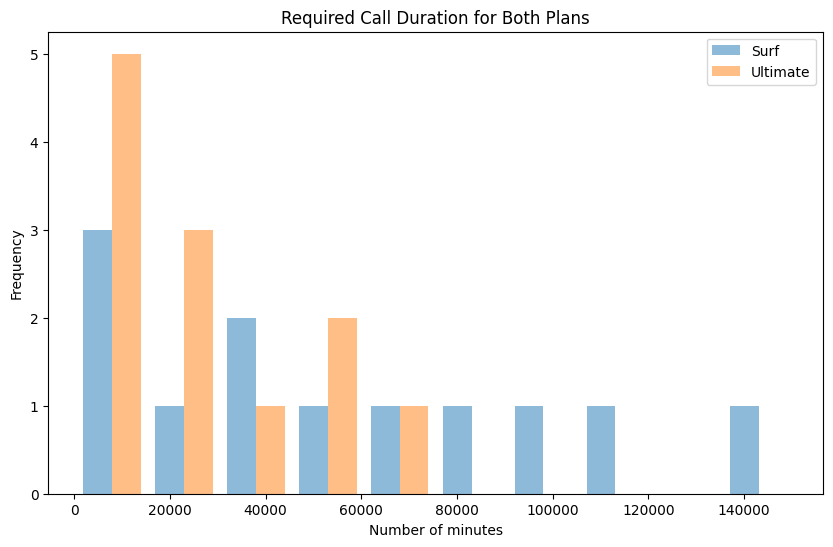

In [32]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
users_minutes = merge_data.groupby(['month', 'plan']).agg({'duration(min)':'sum'})
users_minutes = users_minutes.unstack(level='plan')
print(users_minutes)
plt.figure(figsize=(10, 6))
plt.hist([users_minutes['duration(min)', 'surf'], users_minutes['duration(min)', 'ultimate']], 
         alpha=0.5, bins=10, label=['Surf', 'Ultimate'])
plt.xlabel('Number of minutes')
plt.ylabel('Frequency')
plt.title('Required Call Duration for Both Plans')
plt.legend()
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [33]:
# Calculate the mean and the variance of the monthly call duration
call_duration_mean = merge_data.groupby(['month', 'plan'])['duration(min)'].mean().reset_index()
print(call_duration_mean)
call_duration_var = merge_data.groupby(['month', 'plan'])['duration(min)'].var()
print(call_duration_var)

    month      plan  duration(min)
0       1      surf     203.000000
1       1  ultimate     193.500000
2       2      surf     297.000000
3       2  ultimate     403.142857
4       3      surf     330.000000
5       3  ultimate     304.250000
6       4      surf     351.540000
7       4  ultimate     336.857143
8       5      surf     399.584416
9       5  ultimate     406.241379
10      6      surf     431.298969
11      6  ultimate     370.957447
12      7      surf     449.983471
13      7  ultimate     427.067797
14      8      surf     410.111111
15      8  ultimate     421.436620
16      9      surf     414.226804
17      9  ultimate     437.511628
18     10      surf     429.729958
19     10  ultimate     450.735849
20     11      surf     423.325088
21     11  ultimate     445.196850
22     12      surf     473.836478
23     12  ultimate     459.099338
month  plan    
1      surf        15842.000000
       ultimate    16572.333333
2      surf        52226.500000
       ultima

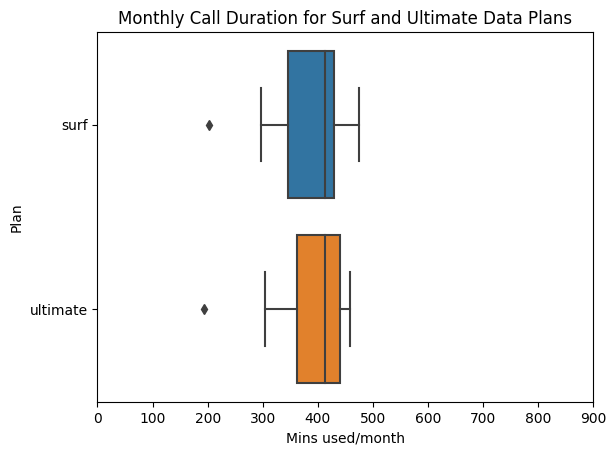

In [34]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(x='duration(min)', y='plan', data=call_duration_mean, orient='h')
plt.title('Monthly Call Duration for Surf and Ultimate Data Plans')
plt.xlabel('Mins used/month')
plt.ylabel('Plan')
plt.xticks(np.arange(0, 1000, step=100))
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

**Average Duration of Calls per Month:**

**Surf Plan:** The average duration of calls for surf plan users shows a steady increase from January to December, peaking in December. The call durations are generally consistent and high throughout the year.

**Ultimate Plan:** Similarly, ultimate plan users also show an increasing trend in call duration from January to December. The average call duration for ultimate plan users is slightly higher or comparable to surf plan users throughout most of the year.

**Distribution of Call Durations:**

**Surf Plan:** The distribution shows a wide range of call durations, with some users having very high total call durations (up to 140,000 minutes). There is a broader spread, indicating varied calling behavior among surf plan users.

**Ultimate Plan:** Most ultimate plan users have lower total call durations, concentrated below 40,000 minutes. The distribution is more concentrated compared to the surf plan, indicating a more uniform calling behavior.

**Monthly Call Duration Box Plot:**

**Surf Plan:** The box plot shows that the median call duration for surf plan users is around 400 minutes per month, with a few outliers indicating higher usage. The interquartile range (IQR) is relatively tight, suggesting consistent usage among most users.

**Ultimate Plan:** The box plot for ultimate plan users shows a similar median call duration of around 400 minutes per month, but the IQR is slightly wider than the surf plan. There are also outliers indicating both lower and higher usage, suggesting some variability in user behavior. 

**Overall, while the average call durations are similar between the two plans, the surf plan users display a wider range of calling behaviors compared to the more consistent patterns observed among ultimate plan users.**

### Messages

<AxesSubplot:title={'center':'Number of messages sent per Plan per Month'}, xlabel='Month', ylabel='messages sent'>

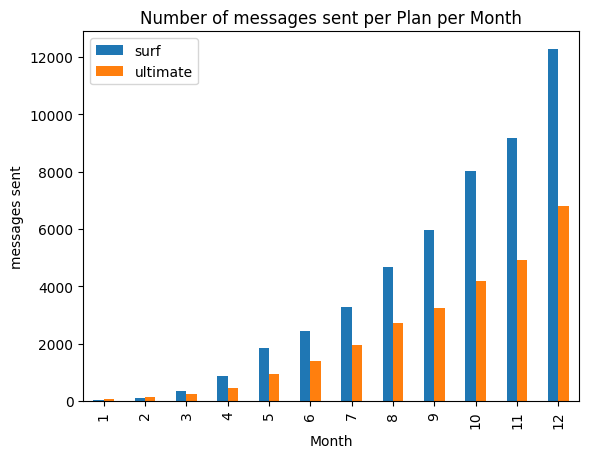

In [35]:
# Compare the number of messages users of each plan tend to send each month
number_of_messages = merge_data.groupby(['month', 'plan'])['messages sent'].sum()
number_of_messages = number_of_messages.unstack(level ='plan')
number_of_messages = number_of_messages.reset_index()
number_of_messages.columns.name= None
number_of_messages.plot(kind='bar', x= 'month', xlabel='Month', ylabel='messages sent', title='Number of messages sent per Plan per Month')


      messages sent         
plan           surf ultimate
month                       
1              21.0     62.0
2             108.0    151.0
3             351.0    243.0
4             870.0    463.0
5            1849.0    931.0
6            2454.0   1379.0
7            3271.0   1937.0
8            4662.0   2732.0
9            5968.0   3259.0
10           8020.0   4181.0
11           9165.0   4903.0
12          12275.0   6796.0


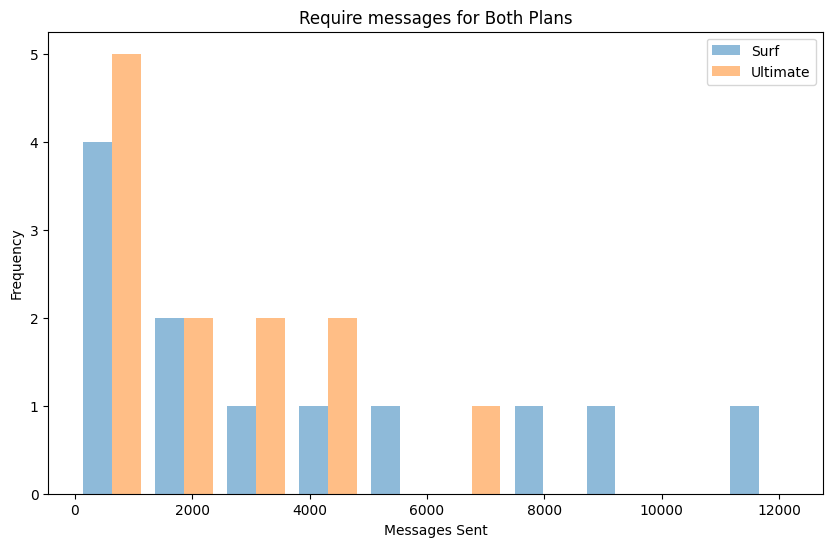

In [36]:
messages_sent = merge_data.groupby(['month', 'plan']).agg({'messages sent':'sum'})
messages_sent = messages_sent.unstack(level='plan')
print(messages_sent)
plt.figure(figsize=(10, 6))
plt.hist([messages_sent['messages sent', 'surf'], messages_sent['messages sent', 'ultimate']], 
         alpha=0.5, bins=10, label=['Surf', 'Ultimate'])
plt.xlabel('Messages Sent')
plt.ylabel('Frequency')
plt.title('Require messages for Both Plans')
plt.legend()
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

**Monthly Number of Messages Sent:**

**Surf Plan:** Users on the surf plan consistently send more messages each month compared to those on the ultimate plan. The number of messages sent increases steadily over the months, peaking in December.

**Ultimate Plan:** Users on the ultimate plan also show an increase in the number of messages sent each month, but their overall message count is lower than that of the surf plan users. The growth trend is similar, peaking in December as well.

**Distribution of Messages Sent:**

**Surf Plan:** There is a broader distribution of the number of messages sent by surf plan users, with some users sending as many as 12,000 messages. This indicates that the surf plan has a diverse user base in terms of messaging activity.

**Ultimate Plan:** The majority of ultimate plan users send fewer messages, mostly between 0 and 4,000 messages. The distribution shows a higher concentration of users who send fewer messages compared to the surf plan. 

**Overall, the surf plan users demonstrate higher and more varied messaging activity compared to ultimate plan users, who generally have lower and more concentrated messaging usage.**

### Internet

    month       surf   ultimate
0       1     9762.0    27705.0
1       2   109736.0   120042.0
2       3   307304.0   220083.0
3       4   599910.0   338950.0
4       5  1074400.0   482669.0
5       6  1485998.0   721690.0
6       7  2033185.0   965457.0
7       8  2724008.0  1266277.0
8       9  3222517.0  1461088.0
9      10  4107618.0  1869118.0
10     11  4629467.0  2165809.0
11     12  5772904.0  2770055.0


<AxesSubplot:title={'center':'Amount of Internet Traffic per Plan per Month'}, xlabel='Month', ylabel='Amount of Internet Traffic'>

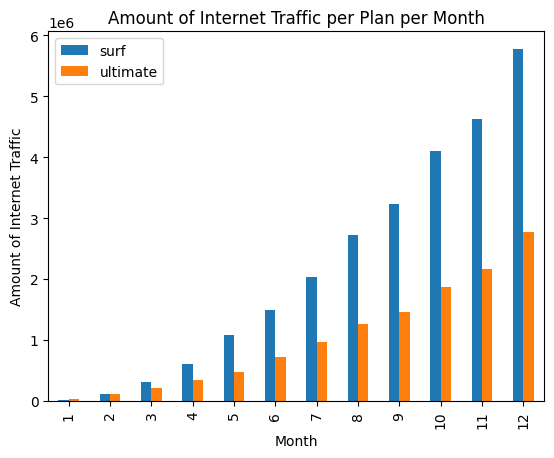

In [37]:
# Compare the amount of internet traffic consumed by users per plan
amount_of_internet_traffic = merge_data.groupby(['month', 'plan'])['data used'].sum()
amount_of_internet_traffic = amount_of_internet_traffic.unstack(level ='plan')
amount_of_internet_traffic = amount_of_internet_traffic.reset_index()
amount_of_internet_traffic.columns.name= None
print(amount_of_internet_traffic)
amount_of_internet_traffic.plot(kind='bar', x= 'month', xlabel='Month', ylabel='Amount of Internet Traffic', title='Amount of Internet Traffic per Plan per Month')


       data used           
plan        surf   ultimate
month                      
1         9762.0    27705.0
2       109736.0   120042.0
3       307304.0   220083.0
4       599910.0   338950.0
5      1074400.0   482669.0
6      1485998.0   721690.0
7      2033185.0   965457.0
8      2724008.0  1266277.0
9      3222517.0  1461088.0
10     4107618.0  1869118.0
11     4629467.0  2165809.0
12     5772904.0  2770055.0


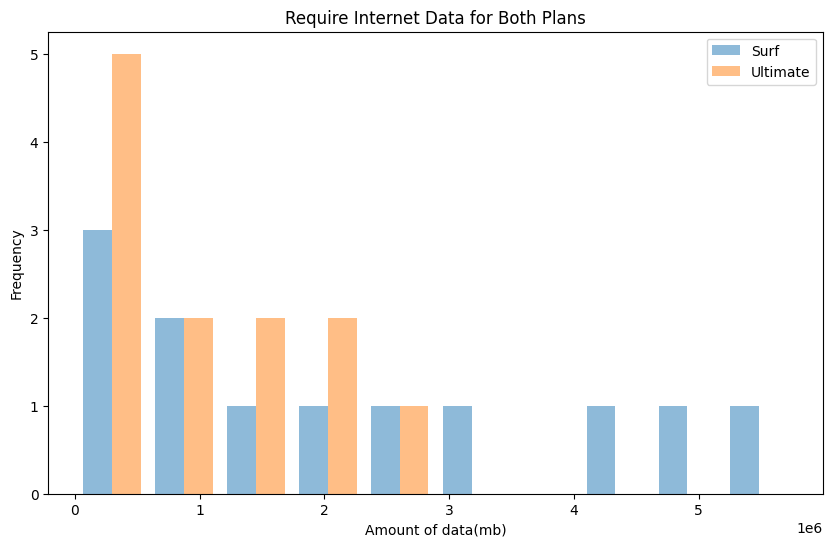

In [38]:
amount_of_data_used = merge_data.groupby(['month', 'plan']).agg({'data used':'sum'})
amount_of_data_used = amount_of_data_used.unstack(level='plan')
print(amount_of_data_used)
plt.figure(figsize=(10, 6))
plt.hist([amount_of_data_used['data used', 'surf'], amount_of_data_used['data used', 'ultimate']], 
         alpha=0.5, bins=10, label=['Surf', 'Ultimate'])
plt.xlabel('Amount of data(mb)')
plt.ylabel('Frequency')
plt.title('Require Internet Data for Both Plans')
plt.legend()
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

**Monthly Internet Traffic Consumption:**

**Surf Plan:** Users on the surf plan consistently use more internet data each month compared to those on the ultimate plan. There is a clear upward trend, indicating increasing usage over the year, peaking in December.


**Ultimate Plan:** Users on the ultimate plan also show an increase in data consumption over the year, but their overall usage is significantly lower than that of the surf plan users.

**Distribution of Internet Data Usage:**

**Surf Plan:** The users on the surf plan have a more varied distribution of internet data usage. There is a noticeable frequency of users who consume higher amounts of data (3 to 6 million MB).

**Ultimate Plan:** The majority of users on the ultimate plan tend to consume less internet data. A significant number of users use between 0 to 1 million MB of data.

**These observations suggest that the surf plan is more suitable for users with high data requirements, while the ultimate plan caters to users with moderate to low data needs.**

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [39]:
ultimate_data = merge_data.query("plan == 'ultimate'")
ultimate_avg = ultimate_data['revenue'].sum() / len(ultimate_data['revenue'])
ultimate_avg

72.33333333333333

In [40]:
surf_data = merge_data.query("plan == 'surf'")
surf_avg = surf_data['revenue'].sum() / len(surf_data['revenue'])
surf_avg


60.79541004450095

In [41]:
diff = (ultimate_avg - surf_avg) / ultimate_avg * 100
print('The average revenue for users of the ultimate plan is ${:.2f}'.format(ultimate_avg))
print('The average revenue for users of the surf plan is ${:.2f}'.format(surf_avg))
print('Percentage difference between ultimate plan revenue and surf plan revenue is {:.2f}%'.format(diff))

The average revenue for users of the ultimate plan is $72.33
The average revenue for users of the surf plan is $60.80
Percentage difference between ultimate plan revenue and surf plan revenue is 15.95%


[Formulate conclusions about how the revenue differs between the plans.]

 In this section, we calculated the statistics of our data. We determined that ultimate users on the average make 58 calls, use 418 minutes per month, sent about 34 messages, and use 16877 MB of data per month. We also computed statistics for surf users, and observed that on the average users make 58 calls, use 418 minutes per month, sent about 28 messages, and use 16553 MB of data per month. We plotted the distribution and the frequency density of the plans per user and observed that surf users have more representation overall than ultimate users. Also, on the average, ultimate users has more call duration per month, send more text messages, require more data volume than users in the surf plan. We also determined that users in the ultimate plan brought in more revenue on the average than users in the surf plan.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

*Null Hypothesis*: There is *no difference* between the average revenue from users of Ultimate and Surf calling plans.

We calculated the average revenue for users of Ultimate calling plan as USD72.31, and the average revenue for the surf plan as USD60.71. We want to know whether the difference between these numbers are significant? That depends on the variance of the samples the values are calculated from. Instead of basing our comparison on the mean alone, we use the data to perform a statistical test. In this experiment, the *null hypothesis* is that there is *no difference* between the average revenue from users of Ultimate and Surf calling plan. The *alternative* hypothesis is that the average revenue from users of Ultimate and Surf calling plans differs. We can carry out hypothesis testing to test the hypothesis. We use a significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another. 

- $H_0$ (null hypothesis): average revenue per month for **ultimate** users = average revenue per month for **surf** users
- $H_1$ (alternative hypothesis): average revenue per month for **ultimate** users <> average revenue per month for **surf** users
- $\alpha$ = 0.05
- If p-value < $\alpha$, then reject null hypothesis. If p-value > $\alpha$, fail to reject null hypothesis.

In [42]:
# Test the hypotheses
ultimate = ultimate_data['revenue']
surf = surf_data['revenue']

alpha = 0.05

results = st.ttest_ind(ultimate, surf, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')


The p-value is: 5.1234033722748e-15
We reject the null hypohesis


We formulated the null hypothesis by stating that there is no difference between the average revenue from users of ultimate and surf calling plans. We used a significance level of 0.05. Since the p-value is less than 0.05, it means that the group are different hence we reject the null hypothesis. Our analysis suggest that average revenue from users of Ultimate and Surf calling plans differs.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [43]:
# Test the hypotheses
newyork_jersey = merge_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']
not_newyork_jersey = merge_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']
print('The average revenue of users in NY-NJ area is ${:.2f}'.format(newyork_jersey.mean()))
print('The average revenue of users from other regions is ${:.2f}'.format(not_newyork_jersey.mean()))

newyork_jersey = merge_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users in NY-NJ
not_newyork_jersey = merge_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users not in NY-NJ

# set critical statistical significance level
alpha = 0.05

# test the hypothesis that the means of the two independent population are equal
results = st.ttest_ind(newyork_jersey, not_newyork_jersey, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# compare the p-value with the significance level
if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The average revenue of users in NY-NJ area is $60.00
The average revenue of users from other regions is $65.29
The p-value is: 0.03408041222493359
We reject the null hypohesis


We have determined the average revenue of users in New York-New Jersey area as USD59.92, and the average revenue of users from other regions as USD65.22. We want to know whether the difference between these number is significant? We set up a hypothesis test for significance using a significance level (or 
 values) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis since it can be used to compare the means of two groups in order to determine whether the two groups are different from one another. The set is shown in the code below.

We formulated our null hypothesis by stating that there is no difference between the average revenue from users in New York-New Jersey area, and users from other region. We used a t-test to test the hypothesis using a significance level of 0.05. Since the p-value is less than 0.05, it means that the group are different hence we reject the null hypothesis. We may not know the size of the difference between the average revenue from users in New York-New Jersey area, and users from other regions. All the test tells us is that they are different. However, by calculating the average number for revenue from users in both groups, we can say with certainty that the mean of the revenue between the two groups are significantly different.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

 By looking at the general information of the data, we identified some errors like problem with the datatype and corrected them by converting datatype to the right format. We analyzed the data by carrying out exploratory data analysis and found that the distribution of the data is slightly skewed to the right. We detected and removed some outliers from the data, and used the filtered data to compute the statistics. We determined that ultimate users on the average make 58 calls, use 418 minutes per month, sent about 34 messages, and use 16877 MB of data per month. We also computed statistics for surf users, and observed that on the average users make 58 calls, use 418 minutes per month, sent about 28 messages, and use 16553 MB of data per month.

We plotted the distribution and the frequency density of the plans per user and observed that surf users have more call count overall than ultimate users. Also, on the average, ultimate users has more call duration per month, send more text messages, require more data volume than users in the surf plan. We also determined that users in the ultimate plan brought in more revenue on the average than users in the surf plan. We also determined that ultimate users brought in more revenue on the average since the average revenue for users in the ultimate plan is 
 16.05% greater than users in the surf plan. The calculated average revenue for users of ultimate calling plan is $72.31, while the average revenue for the surf plan as $60.71.

We formulated the null hypothesis by stating that there is no difference between the average revenue from users of ultimate and surf calling plans. We used a significance level of 0.05 to calculate the p-value. From the hypothesis test, we determined that the group are different hence we reject the null hypothesis. The test suggested that average revenue from users of Ultimate and Surf calling plans differs. We also tested the hypothesis by stating that there is no difference between the average revenue from users in New York-New Jersey area, and users from other region. Our hypothesis test shows that the average revenue from users in New York-New Jersey area, and users from other region are different.

We can conclude from this analysis that:

- users on the ultimate plan has more call duration per month, send more text messages, require more data volume, and brings in more average revenue than users on the surf plan.
- users on the surf plan on the average make more calls than users on the ultimate plan.
- the average revenue from users in other regions is greater than revenue from users in the New York-New Jersey area.
- the commercial department should adjust advertising budget and advertise more calls, messaging and internet data offers to the user in the ultimate plan.
- the commercial department should invest in more advertisements in other regions since Megaline makes more money in that area than the New York-New Jersey area .
- the ultimate plan is more profitable than the surf plan even though the surf plan has more users overall than the ultimate plan.

We could carry out further analysis to determine the average revenue by age group. That will also inform Megaline telecom on which age group and advertising medium to target for marketing purposes. For instance, if we analyze that people in the age group 1 - 25 brings in more revenue, we can also determine whether marketing on social media apps like TikTok or Instagram will bring in more users and revenue than TV or billboard advertisement.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You've done a great job. There are a few things that need to be fixed

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊